In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
from pylcp.atom import atom
import scipy.constants as cts
from numpy import random as rnd
from pylcp.common import progressBar
import pandas as pd
import magpylib as mg
import numpy.random 
import magpylib as magpy
from scipy.interpolate import RegularGridInterpolator
from scipy.stats import rv_continuous
import concurrent.futures as cf

In [16]:
det = -2.0
alpha = 1.0
s = 1.0

# Define the atomic Hamiltonian for 7Li:
H_g_D2, mu_q_g_D2 = pylcp.hamiltonians.hyperfine_coupled(
0, 5/2, 0,  	-0.2592,
    Ahfs = 0, Bhfs=0, Chfs=0,
    muB=1)# ground state 1s0
H_e_D2, mu_q_e_D2 = pylcp.hamiltonians.hyperfine_coupled(
1, 5/2, 1.035,	-0.2592,
    Ahfs=59.52*1e6,Bhfs = 601.87*1e6 , Chfs= 0,
    muB=1) #excited state 1p1

dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(0, 1, 5/2)

E_e_D2 = np.unique(np.diagonal(H_e_D2))
E_g_D2 = np.unique(np.diagonal(H_g_D2))

hamiltonian_D2 = pylcp.hamiltonian(H_g_D2, H_e_D2, mu_q_g_D2, mu_q_e_D2, dijq_D2)

# Now, we need to sets of laser beams -> one for F=1->2 and one for F=2->3:
laserBeams_cooling_D2 = pylcp.conventional3DMOTBeams(
    s=s, delta= (E_e_D2[1] - E_g_D2[0]) + det)
laserBeams_repump_D2 = pylcp.conventional3DMOTBeams(
    s=s, delta= (E_e_D2[1] - E_g_D2[0]) + det)
laserBeams_D2 = laserBeams_cooling_D2 + laserBeams_repump_D2
alpha = 5*1e-3*cts.value('Bohr magneton')*t0*cts.hbar
magField = pylcp.quadrupoleMagneticField(alpha)


NameError: name 't0' is not defined

In [10]:
E_e_D2

array([-5.410160e+08,  2.129890e+08,  2.992675e+08])

In [12]:
x = np.arange(-5, 5.1, 0.2)
v = np.arange(-5, 5.1, 0.2)

dx = np.mean(np.diff(x))
dv = np.mean(np.diff(v))

X, V = np.meshgrid(x, v)

# Define the trap:
trap_D2 = pylcp.rateeq(
    laserBeams_D2, magField, hamiltonian_D2,
    include_mag_forces=False
)
trap_D2.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
FzLi_D2 = trap_D2.profile['Fz'].F[2]

c:\Users\benfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  self.Rijl[key][ll] = gamma*intensity/2*\


<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
C:\Users\benfo\AppData\Local\Temp\ipykernel_10096\1647725273.py:27: SyntaxWarning: invalid escape sequence '\G'
  ax[0, 0].set_ylabel('$v/(\Gamma/k)$')
C:\Users\benfo\AppData\Local\Temp\ipykernel_10096\1647725273.py:28: SyntaxWarning: invalid escape sequence '\h'
  ax[1, 0].set_ylabel('$f/(\hbar k \Gamma)$')
C:\Users\benfo\AppData\Local\Temp\ipykernel_10096\1647725273.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax[1, 0].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$')
C:\Users\benfo\AppData\Local\Temp\ipykernel_10096\1647725273.py:30: SyntaxWarning: invalid escape sequence '\m'
  ax[1,

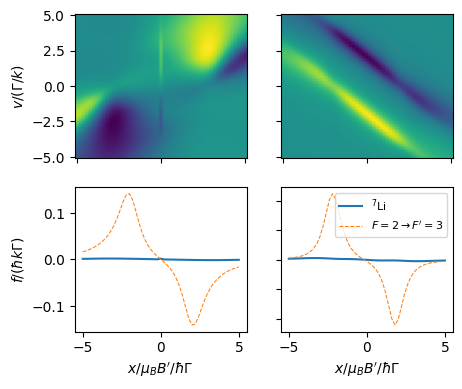

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(1.5*3.25, 1.5*2.75))
ax[0, 0].imshow(FzLi_D2, origin='upper',
               extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
                       np.amin(v)-dv/2, np.amax(v)+dv/2),
               aspect='auto')
ax[0, 1].imshow(Fz2to3, origin='lower',
               extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
                       np.amin(v)-dv/2, np.amax(v)+dv/2),
               aspect='auto')
ax[1, 0].plot(X[int(X.shape[0]/2), :],
              FzLi_D2[int(X.shape[0]/2), :])
ax[1, 0].plot(X[int(X.shape[0]/2), :],
              Fz2to3[int(X.shape[0]/2), :], '--',
              linewidth=0.75)
ax[1, 1].plot(V[:, int(X.shape[1]/2)+1],
              FzLi_D2[:, int(X.shape[1]/2)+1], label='$^7$Li')
ax[1, 1].plot(V[:, int(X.shape[1]/2)+1],
              Fz2to3[:, int(X.shape[1]/2)+1], '--',
              label='$F=2 \\rightarrow F\'=3$',
              linewidth=0.75)

ax[1, 1].legend(fontsize=8)

[ax[ii, 1].yaxis.set_ticklabels('') for ii in range(2)]
[ax[0, ii].xaxis.set_ticklabels('') for ii in range(2)]

ax[0, 0].set_ylabel('$v/(\Gamma/k)$')
ax[1, 0].set_ylabel('$f/(\hbar k \Gamma)$')
ax[1, 0].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$')
ax[1, 1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');